In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix

In [41]:
#downloading the white_wine.csv dataset
white_wine=pd.read_csv("data/white_wine.csv", sep=";")
white_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [42]:
#printing the white wine dataset info
white_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [43]:
#the white wine dataset descriptive statistics
white_wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [44]:
white_wine.shape

(4898, 12)

In [45]:
white_wine.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [46]:
#substituting the white space for underscore
col=[i.replace(" ", "_") for i in white_wine.columns]
white_wine.columns=col
white_wine.head()


,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [47]:
#calculating the correlation matrix
cor_white_wine=white_wine.corr(method="pearson")
cor_white_wine

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
fixed_acidity,1.000000,-0.022697,0.289181,0.089021,0.023086,-0.049396,0.091070,0.265331,-0.425858,-0.017143,-0.120881,-0.113663
volatile_acidity,-0.022697,1.000000,-0.149472,0.064286,0.070512,-0.097012,0.089261,0.027114,-0.031915,-0.035728,0.067718,-0.194723
citric_acid,0.289181,-0.149472,1.000000,0.094212,0.114364,0.094077,0.121131,0.149503,-0.163748,0.062331,-0.075729,-0.009209
residual_sugar,0.089021,0.064286,0.094212,1.000000,0.088685,0.299098,0.401439,0.838966,-0.194133,-0.026664,-0.450631,-0.097577
chlorides,0.023086,0.070512,0.114364,0.088685,1.000000,0.101392,0.198910,0.257211,-0.090439,0.016763,-0.360189,-0.209934
free_sulfur_dioxide,-0.049396,-0.097012,0.094077,0.299098,0.101392,1.000000,0.615501,0.294210,-0.000618,0.059217,-0.250104,0.008158
total_sulfur_dioxide,0.091070,0.089261,0.121131,0.401439,0.198910,0.615501,1.000000,0.529881,0.002321,0.134562,-0.448892,-0.174737
density,0.265331,0.027114,0.149503,0.838966,0.257211,0.294210,0.529881,1.000000,-0.093591,0.074493,-0.780138,-0.307123
pH,-0.425858,-0.031915,-0.163748,-0.194133,-0.090439,-0.000618,0.002321,-0.093591,1.000000,0.155951,0.121432,0.099427
sulphates,-0.017143,-0.035728,0.062331,-0.026664,0.016763,0.059217,0.134562,0.074493,0.155951,1.000000,-0.017433,0.053678


<AxesSubplot:>

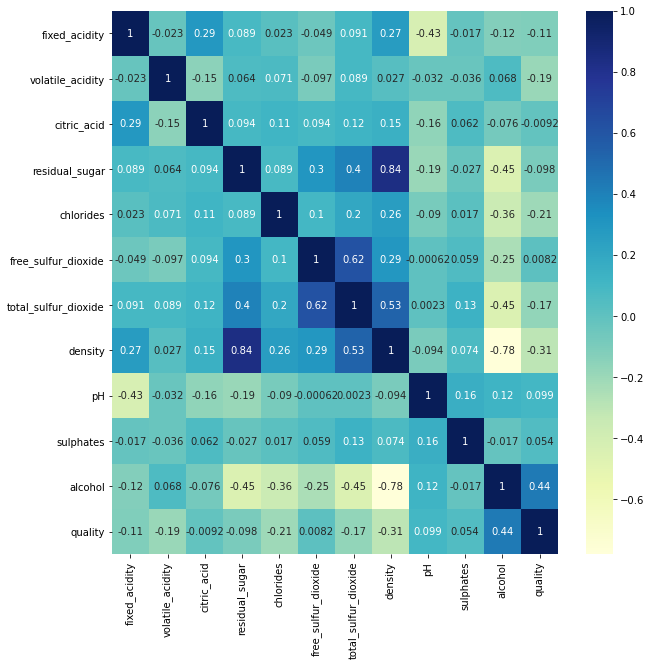

In [48]:
#visualization of the correlation matrix
plt.rcParams["figure.figsize"]=(10, 10)
sn.heatmap(data=cor_white_wine, annot=True, cmap="YlGnBu")

In [49]:
"""defining the correlation function that returns highly correlated features.
This function has two arguments"""
def correlation(dataset, threshold):
    col_corr=[]
    corr_matrix=dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range (i):
            if abs(corr_matrix.iloc[i, j])>threshold:
                colname=corr_matrix.columns[j]
                rowname=corr_matrix.index[i]
                col_corr.append((colname, rowname))
    return col_corr
corr_col=correlation(white_wine.iloc[:, :-1], 0.7)
print("Highly correlated variables are ", corr_col)

Highly correlated variables are  [('residual_sugar', 'density'), ('density', 'alcohol')]


In [50]:
"""defining the checking_normality() function that determines highly correlated featurs"""
def checking_normality(dataframe):
    import scipy.stats as st
    for col in dataframe.columns:
        a, b=st.normaltest(dataframe[col])
        if b<0.05:
            print(col+" is not normally distributed")
            print("-"*40)
        else:
            print((col+" is normally distributed"))
            print("-"*40)
checking_normality(white_wine)
        

fixed_acidity is not normally distributed
----------------------------------------
volatile_acidity is not normally distributed
----------------------------------------
citric_acid is not normally distributed
----------------------------------------
residual_sugar is not normally distributed
----------------------------------------
chlorides is not normally distributed
----------------------------------------
free_sulfur_dioxide is not normally distributed
----------------------------------------
total_sulfur_dioxide is not normally distributed
----------------------------------------
density is not normally distributed
----------------------------------------
pH is not normally distributed
----------------------------------------
sulphates is not normally distributed
----------------------------------------
alcohol is not normally distributed
----------------------------------------
quality is not normally distributed
----------------------------------------


C:\Users\User\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='quality', ylabel='count'>

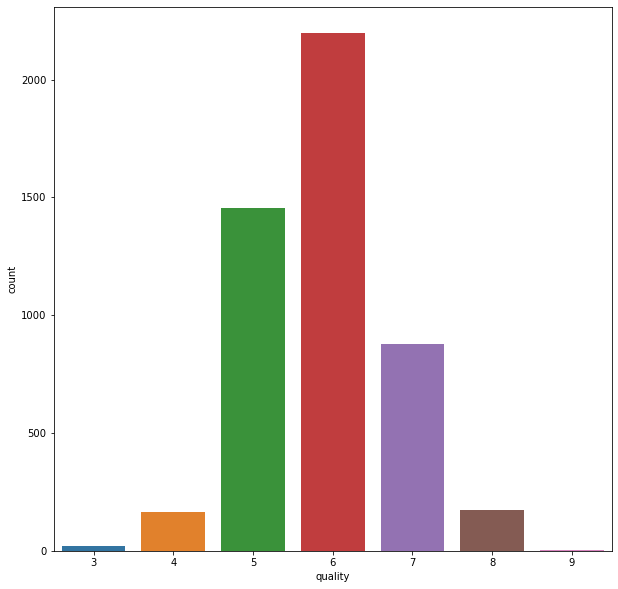

In [51]:
#count plot for the white_wine quality variable
sn.countplot(white_wine["quality"])

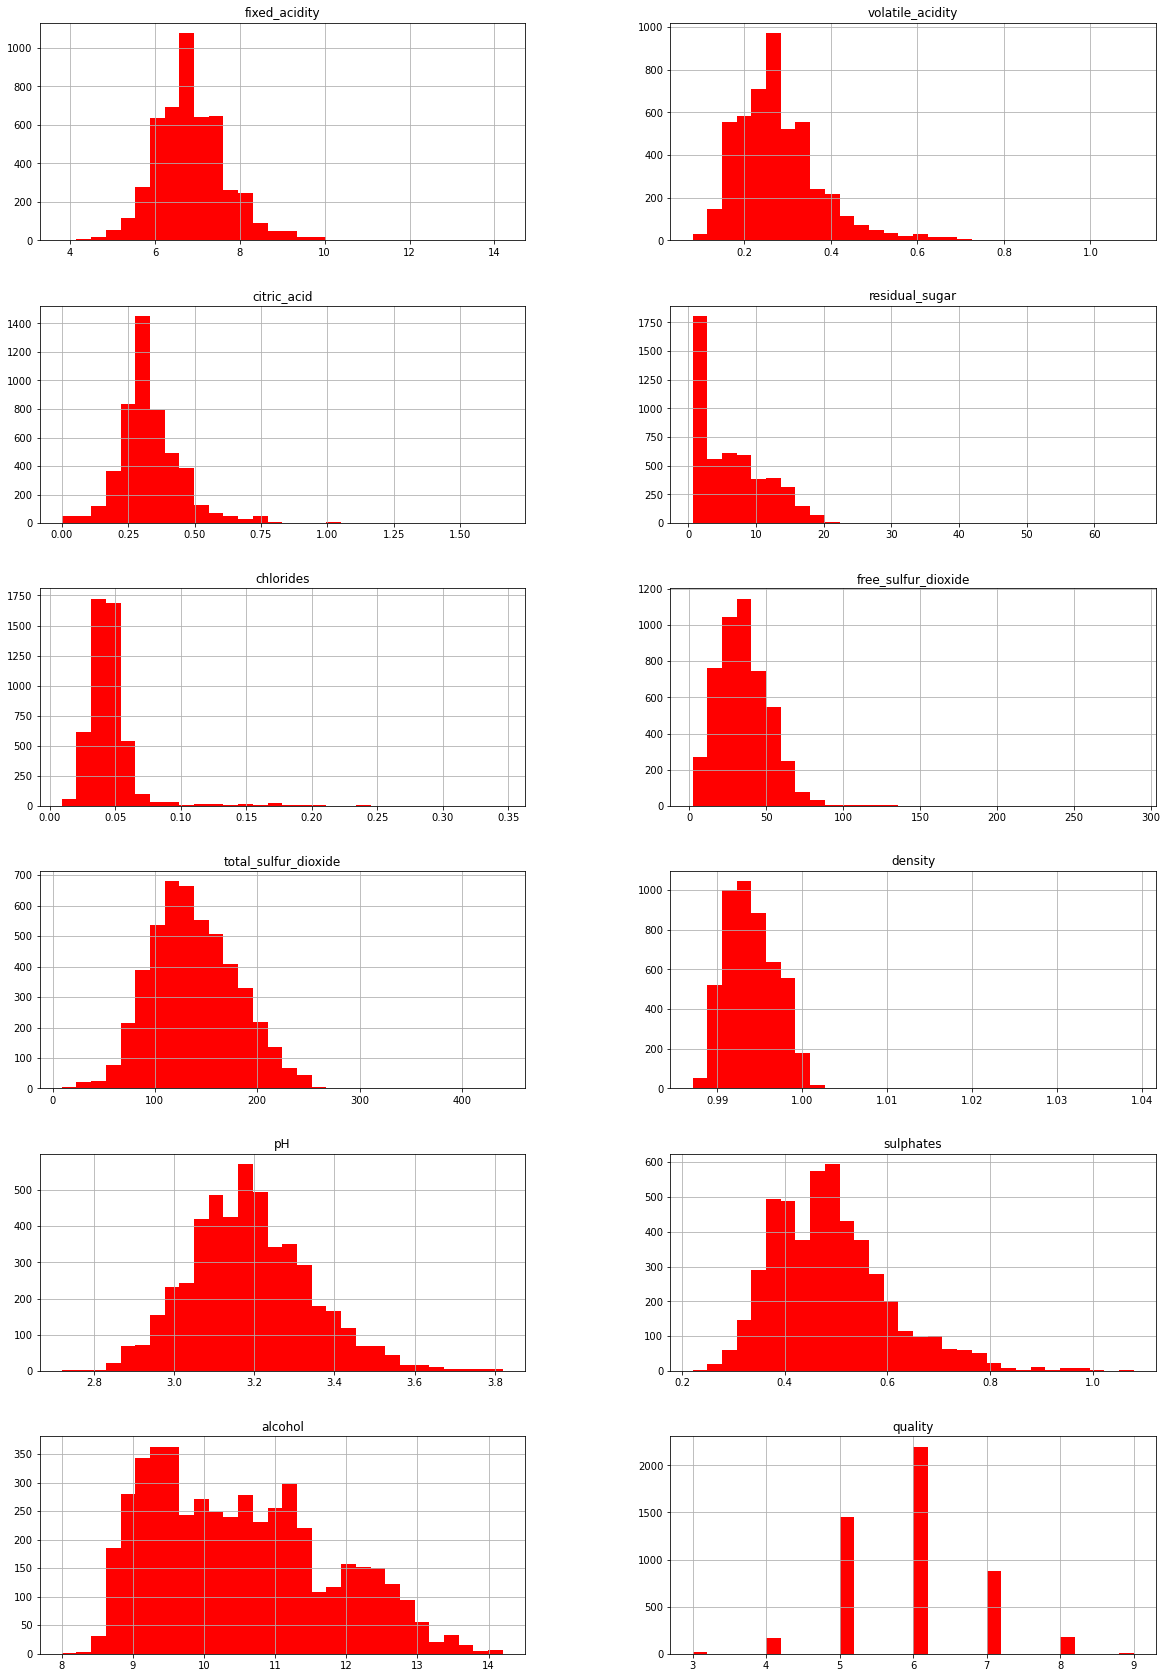

In [52]:
#histogram of the white_wine dataset variables
white_wine.hist(bins=30, facecolor="red", layout=(6, 2), figsize=(20, 30))
plt.show()

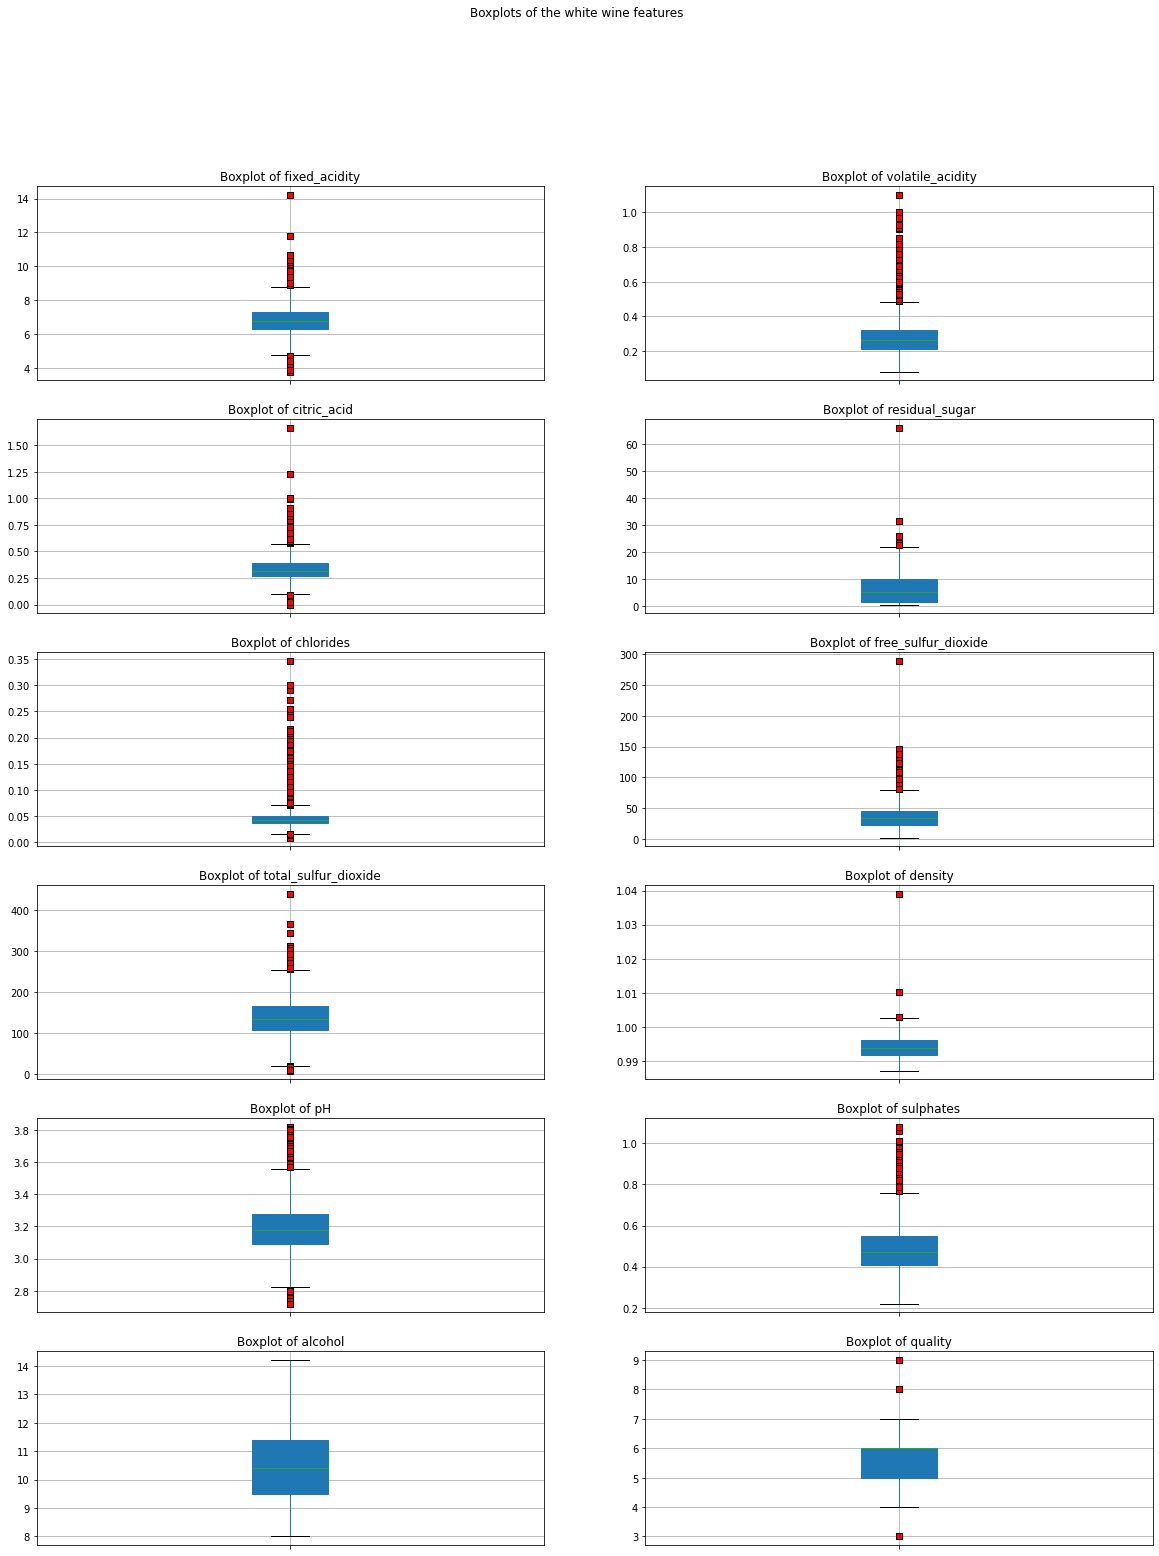

In [53]:

#boxplot of the white_wine dataframe variables
fig=plt.figure(figsize=(20, 25))
red_square=dict(markerfacecolor="r", marker="s")
fig.suptitle("Boxplots of the white wine features")
for i, col in enumerate (white_wine.columns):
    ax=fig.add_subplot(6, 2, i+1)
    ax.set_title("Boxplot of "+col)
    white_wine[[col]].boxplot(ax=ax, flierprops=red_square, patch_artist=True)
    ax.set(xticklabels=[])

In [54]:
#downloading the red_wine.csv dataset
red_wine=pd.read_csv("data/red_wine.csv", sep=";")
red_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [55]:
#the red_wine dataframe info
red_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [56]:
#descriptive statistics of the red_wine dataframe
red_wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [57]:
red_wine.shape

(1599, 12)

In [58]:
red_wine.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [59]:
#substituting the white space for underscore
col=[i.replace(" ", "_") for i in red_wine.columns]
red_wine.columns=col
red_wine.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [60]:
#calculating the correlation matrix
cor_red_wine=red_wine.corr(method="pearson")
cor_red_wine

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
fixed_acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile_acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric_acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual_sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free_sulfur_dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total_sulfur_dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


<AxesSubplot:>

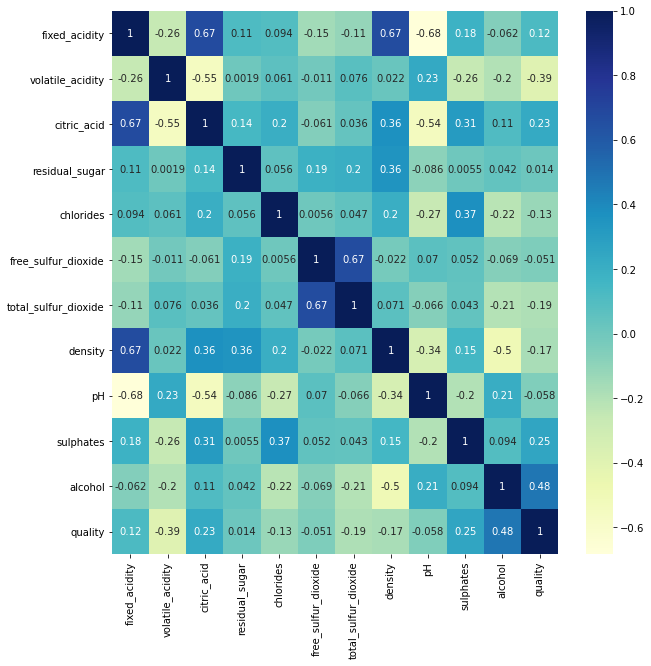

In [61]:
#visualization of the correlation matrix
plt.rcParams["figure.figsize"]=(10, 10)
sn.heatmap(data=cor_red_wine, annot=True, cmap="YlGnBu")

In [62]:
#seraching for the highly correlated features
corr_col=correlation(red_wine.iloc[:, :-1], 0.7)
print("Highly correlated variables are ", corr_col)

Highly correlated variables are  []


In [63]:
#checking whether the red wine dataframe features are normally distributed
checking_normality(red_wine)

fixed_acidity is not normally distributed
----------------------------------------
volatile_acidity is not normally distributed
----------------------------------------
citric_acid is not normally distributed
----------------------------------------
residual_sugar is not normally distributed
----------------------------------------
chlorides is not normally distributed
----------------------------------------
free_sulfur_dioxide is not normally distributed
----------------------------------------
total_sulfur_dioxide is not normally distributed
----------------------------------------
density is not normally distributed
----------------------------------------
pH is not normally distributed
----------------------------------------
sulphates is not normally distributed
----------------------------------------
alcohol is not normally distributed
----------------------------------------
quality is not normally distributed
----------------------------------------


C:\Users\User\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='quality', ylabel='count'>

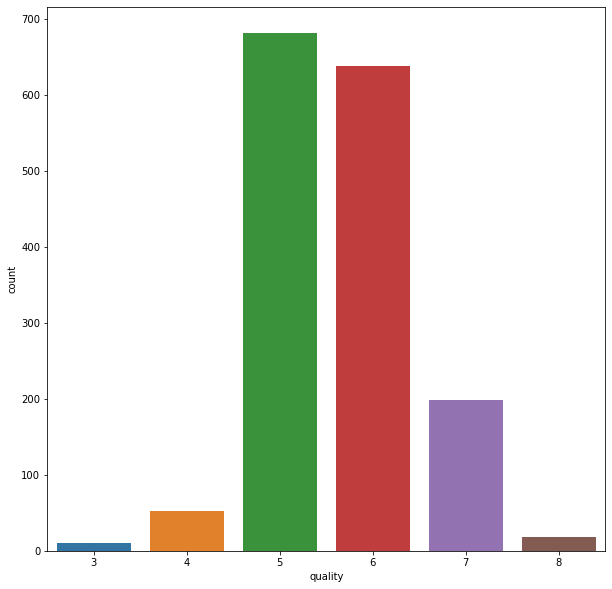

In [64]:
# the count plot for the quality variable of the red_wine dataframe
sn.countplot(red_wine["quality"])

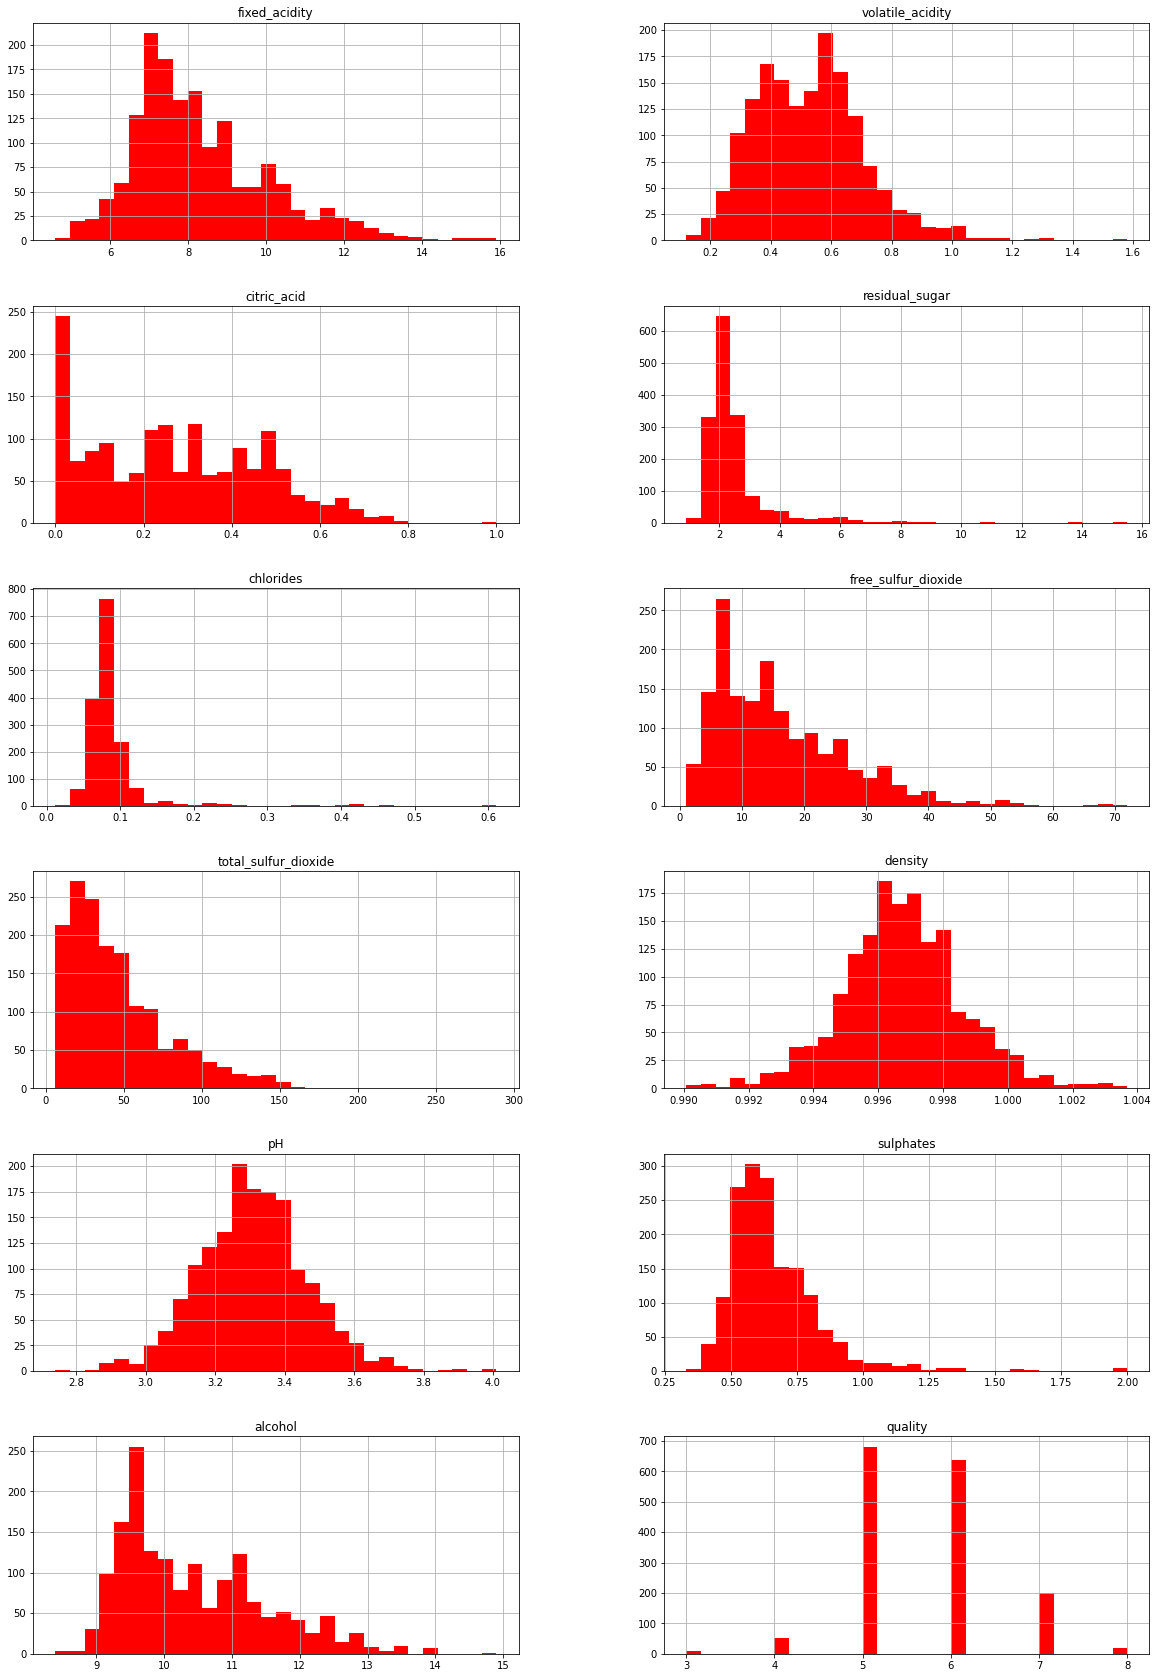

In [65]:
#histograms of the red_wine dataframe variables
red_wine.hist(bins=30, facecolor="red", layout=(6, 2), figsize=(20, 30))
plt.show()

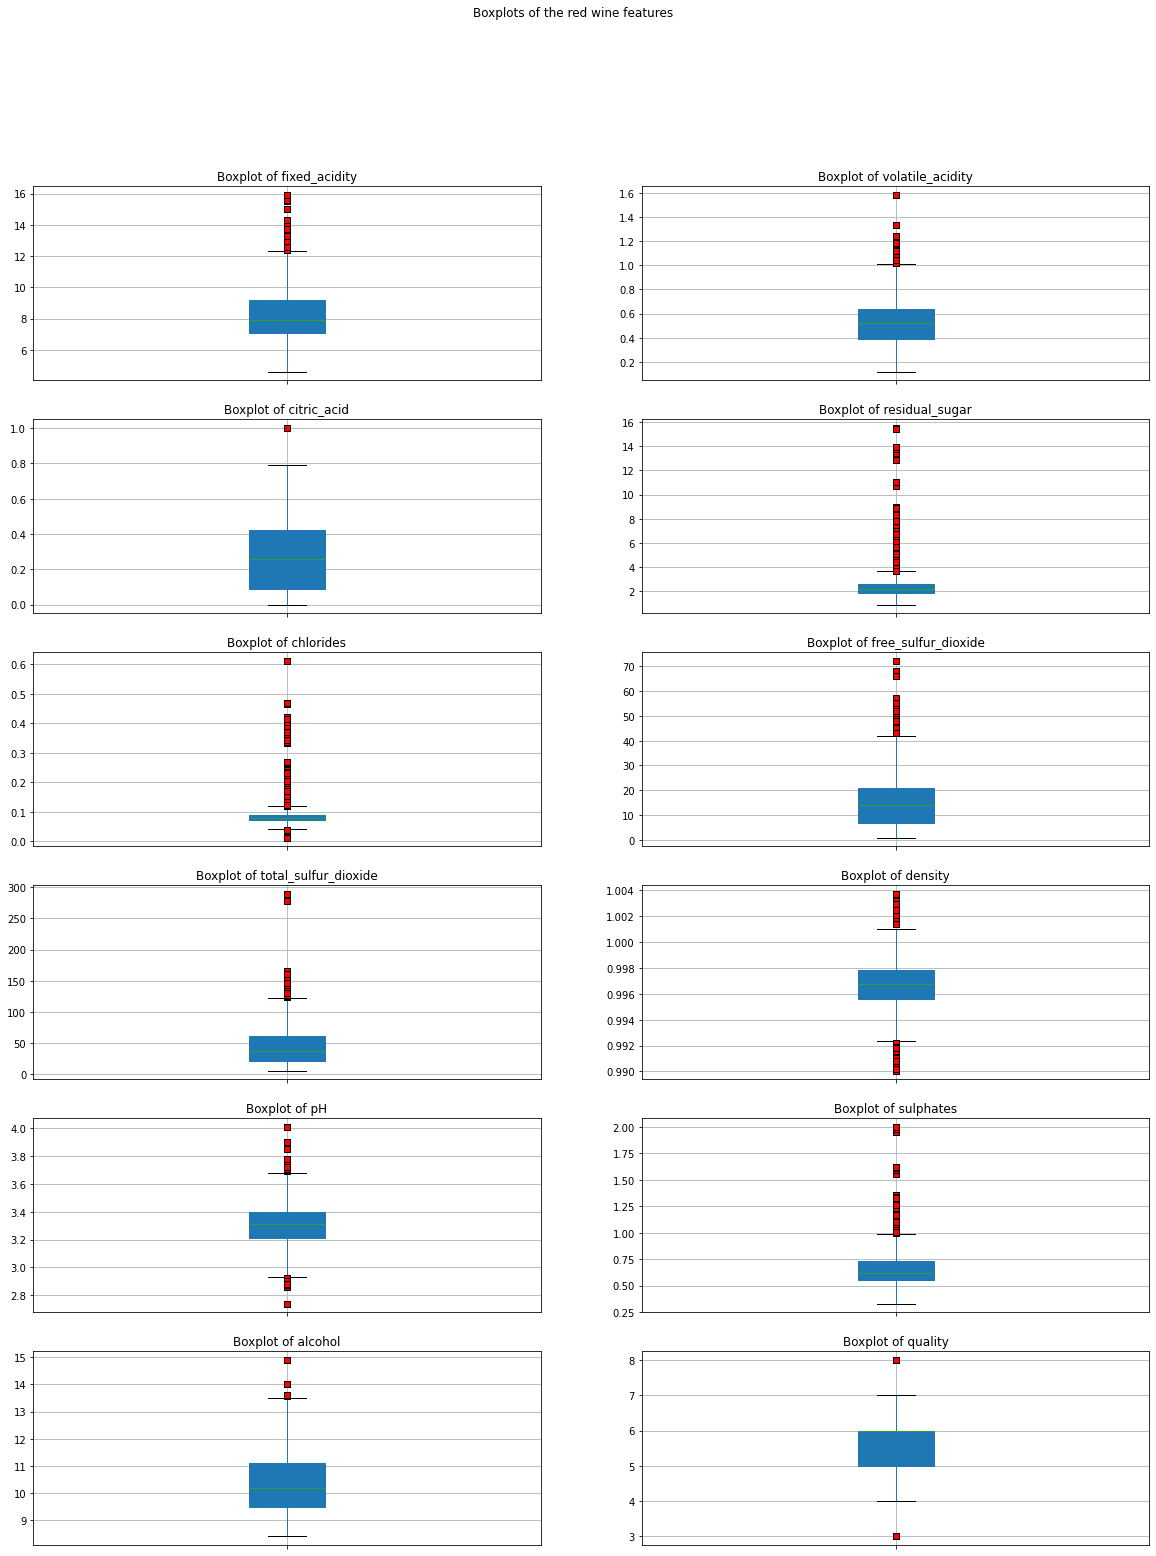

In [66]:
#boxplots of the red_wine dataframe variables
fig=plt.figure(figsize=(20, 25))
red_square=dict(markerfacecolor="r", marker="s")
fig.suptitle("Boxplots of the red wine features")
for i, col in enumerate (red_wine.columns):
    ax=fig.add_subplot(6, 2, i+1)
    ax.set_title("Boxplot of "+col)
    red_wine[[col]].boxplot(ax=ax, flierprops=red_square, patch_artist=True)
    ax.set(xticklabels=[])

In [67]:

#concatenation of the white wine and the red wine datasets into one dataset and printing its info
wine=pd.concat([white_wine.assign(type="white"), red_wine.assign(type="red")])
wine.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6497 entries, 0 to 1598
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         6497 non-null   float64
 1   volatile_acidity      6497 non-null   float64
 2   citric_acid           6497 non-null   float64
 3   residual_sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free_sulfur_dioxide   6497 non-null   float64
 6   total_sulfur_dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  type                  6497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 710.6+ KB


In [68]:
#calculating both the white wine and the red wine frequences
wine.type.value_counts()

white    4898
red      1599
Name: type, dtype: int64

### Wine type determination using logistic regression


In [69]:
#generating the new column-type. In this column the red wine is labeled as 1, and the white wine as 0
wine_labels=np.where(wine.type=="red", 1, 0)
wine_features=wine.drop(columns=["quality", "type"])

In [70]:

X_train, X_test, y_train, y_test=train_test_split(wine_features, wine_labels, test_size=0.25, random_state=1000, stratify=wine_labels)


In [71]:
#generating pipeline object
model_wine=Pipeline([
    ("scale", StandardScaler()),
    ("lr", LogisticRegression(solver="lbfgs", random_state=1000))
]).fit(X_train, y_train)

In [72]:
#model parameters
model_wine["lr"].get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': 1000,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [73]:
#model coefficients
model_wine["lr"].coef_

array([[ 0.46576785,  1.30659299, -0.2238412 , -2.83568404,  0.91242147,
         0.63410451, -2.73602889,  2.90569897,  0.45871856,  0.80944838,
         1.02072635]])

In [74]:
#model intercept
model_wine["lr"].intercept_

array([-4.04793157])

In [75]:
#creating the predicted labesl for the wine dataset
predicted_labels=model_wine.predict(X_test)

In [76]:
"""defining the confusion_matrix_visual() to visualize the confusion matrix"""
def confusion_matrix_visual(y_true, y_pred, class_labels, ax=None, title=None, **kwargs):
    """y_test: true labels for y
       y_pred: predicted labels for y
       class_labels: labels of differemt classes
       ax: matplotlib axes
       title: the plot title
       **kwargs: additional arguments in the form of a dictionary"""
    matrix=confusion_matrix(y_true, y_pred)
    ax=sn.heatmap(matrix.T, square=True, annot=True, fmt="d", cmap=plt.cm.Blues, ax=ax,  **kwargs)
    ax.set_xlabel("Actual")
    ax.set_ylabel("Model Prediction")
    tick_marks=np.arange(len(class_labels))+0.5
    ax.set_xticks(tick_marks)
    ax.set_xticklabels(class_labels)
    ax.set_yticks(tick_marks)
    ax.set_yticklabels(class_labels, rotation=0)
    ax.set_title("Confusion matrix")
    return ax

<AxesSubplot:title={'center':'Confusion matrix'}, xlabel='Actual', ylabel='Model Prediction'>

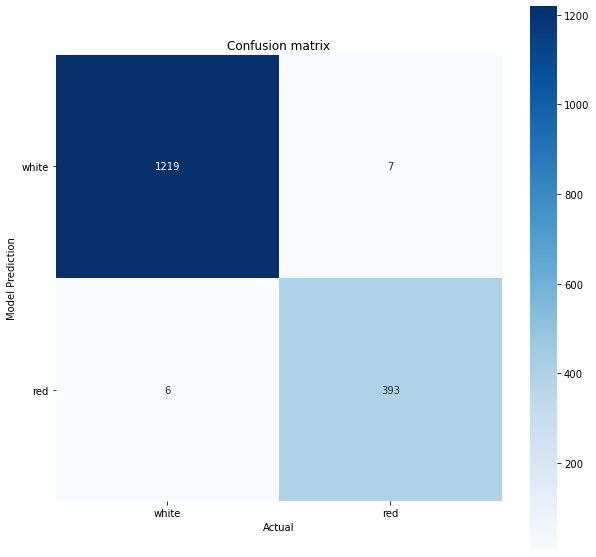

In [77]:
#visualizing the confusion matrix
confusion_matrix_visual(y_test, predicted_labels, ["white", "red"])

In [78]:
#generating the classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, predicted_labels))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1225
           1       0.98      0.98      0.98       400

    accuracy                           0.99      1625
   macro avg       0.99      0.99      0.99      1625
weighted avg       0.99      0.99      0.99      1625

